In [146]:
import pandas as pd
pd.set_option('display.max_rows', 1000)

In [112]:
ds2017 = pd.read_csv("dataset/poderes-judiciales-causas-penales-2017.csv")
ds2018s1 = pd.read_csv("dataset/poderes-judiciales-causas-penales-2018-semestre-1.csv")
ds2018s2 = pd.read_csv("dataset/poderes-judiciales-causas-penales-2018-semestre-2.csv")
ds2019s1 = pd.read_csv("dataset/poderes-judiciales-causas-penales-2019-semestre-1.csv")
ds2019s2 = pd.read_csv("dataset/poderes-judiciales-causas-penales-2019-semestre-2.csv")
ds2020s1 = pd.read_csv("dataset/poderes-judiciales-causas-penales-2020-semestre-1.csv")

/home/chanchus/developments/ml-titanic/titanic/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


provincia_nombre
Chubut    258
Name: provincia_nombre, dtype: int64

In [203]:
ds = ds2019s1.copy()
ds.caso_fecha_inicio = pd.to_datetime(ds.caso_fecha_inicio)
ds['imonth'] = pd.DatetimeIndex(ds.caso_fecha_inicio).month
ds['iyear'] = pd.DatetimeIndex(ds.caso_fecha_inicio).year
ds['iday'] = pd.DatetimeIndex(ds.caso_fecha_inicio).day
ds['iweek'] = pd.DatetimeIndex(ds.caso_fecha_inicio).week
ds['week_start'] = ds['caso_fecha_inicio'] - ds['caso_fecha_inicio'].dt.weekday.astype('timedelta64[D]')
ds[ds.provincia_id==14].groupby(['week_start']).causa_id.count()

week_start
2018-12-31     284
2019-01-07     483
2019-01-14     386
2019-01-21     437
2019-01-28     741
2019-02-04    2232
2019-02-11    1787
2019-02-18    1664
2019-02-25    1685
2019-03-04     999
2019-03-11    1894
2019-03-18    1909
2019-03-25    1796
2019-04-01    1570
2019-04-08    2085
2019-04-15    1262
2019-04-22    1864
2019-04-29    1465
2019-05-06    1801
2019-05-13    1871
2019-05-20    1737
2019-05-27    1835
2019-06-03    1764
2019-06-10    1624
2019-06-17     958
2019-06-24    1627
Name: causa_id, dtype: int64

In [204]:
import matplotlib.pyplot as plt

In [205]:
ds.groupby(['provincia_nombre','provincia_id']).count()

,,causa_id,caso_id_ministerio_publico,circunscripcion_id,circunscripcion_descripcion,unidad_id,unidad_descripcion,caso_fecha_inicio,causa_fecha_hecho,delito_codigo,delito_descripcion,delito_tentativa,delito_estadistico,fecha_envio,imonth,iyear,iday,iweek,week_start
provincia_nombre,provincia_id,,,,,,,,,,,,,,,,,,
Chubut,26,1833,1831,1833,1833,1833,1833,1833,0,1574,1574,1574,1833,1833,1833,1833,1833,1833,1833
Corrientes,18,19745,19745,19745,19745,19745,19745,19745,19745,19680,19680,19680,19745,19745,19745,19745,19745,19745,19745
Córdoba,14,37760,37760,37760,37760,37760,37760,37760,37760,21409,21409,21409,37760,37760,37760,37760,37760,37760,37760
La Pampa,42,799,799,799,799,799,0,799,799,797,797,797,799,799,799,799,799,799,799


In [207]:
cases = ds[ds.provincia_id==14]
cases_by_week = cases.groupby('week_start').causa_id.count()
cases_by_week[10:]

week_start
2019-03-11    1894
2019-03-18    1909
2019-03-25    1796
2019-04-01    1570
2019-04-08    2085
2019-04-15    1262
2019-04-22    1864
2019-04-29    1465
2019-05-06    1801
2019-05-13    1871
2019-05-20    1737
2019-05-27    1835
2019-06-03    1764
2019-06-10    1624
2019-06-17     958
2019-06-24    1627
Name: causa_id, dtype: int64

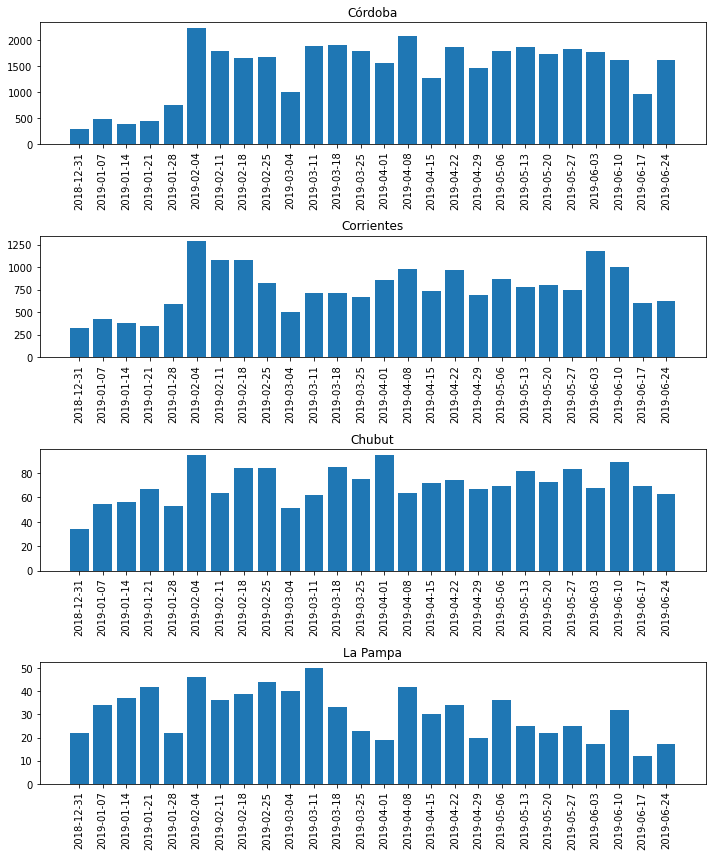

In [208]:
import numpy as np
provinces = ds.provincia_nombre.unique()
fig,axs = plt.subplots(len(provinces),1,figsize=(10,len(provinces)*3))


for i,p in enumerate(provinces):
    cases = ds[ds.provincia_nombre==p]
    cases_by_week = cases.groupby('week_start').causa_id.count()
    weeks = list(cases_by_week.index.strftime('%Y-%m-%d'))
    x = np.arange(len(weeks))

    axs[i].bar(x,cases_by_week)
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(weeks,rotation=90)
    axs[i].set_title(p)
fig.tight_layout()
plt.show()

In [209]:
provinces_ids = ds.groupby(['provincia_nombre','provincia_id']).causa_id.count()
provinces_ids

provincia_nombre  provincia_id
Chubut            26               1833
Corrientes        18              19745
Córdoba           14              37760
La Pampa          42                799
Name: causa_id, dtype: int64

(-1.2199924110600917,
 1.2107250439856125,
 -1.2142353734367355,
 1.2102016833224325)

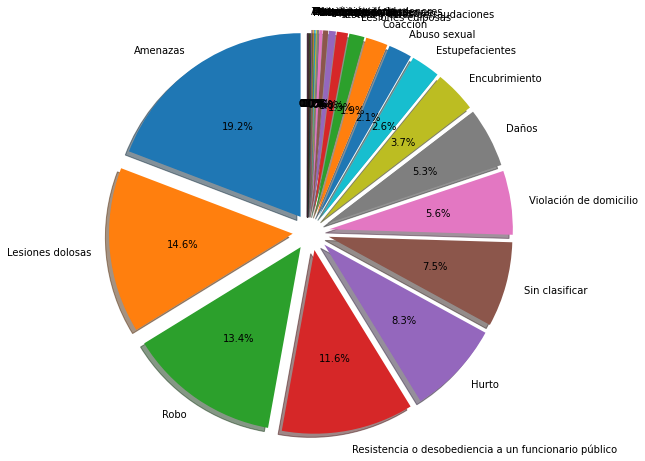

In [210]:
filter_ds = np.logical_and(ds.delito_estadistico != 'Sin informar', ds.provincia_id==14)
delitos = ds[filter_ds].groupby("delito_estadistico").causa_id.count()
delitos = delitos.sort_values(ascending=False)
sizes = delitos.tolist()
labels = delitos.index
explode = [0.1 for i in sizes]

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

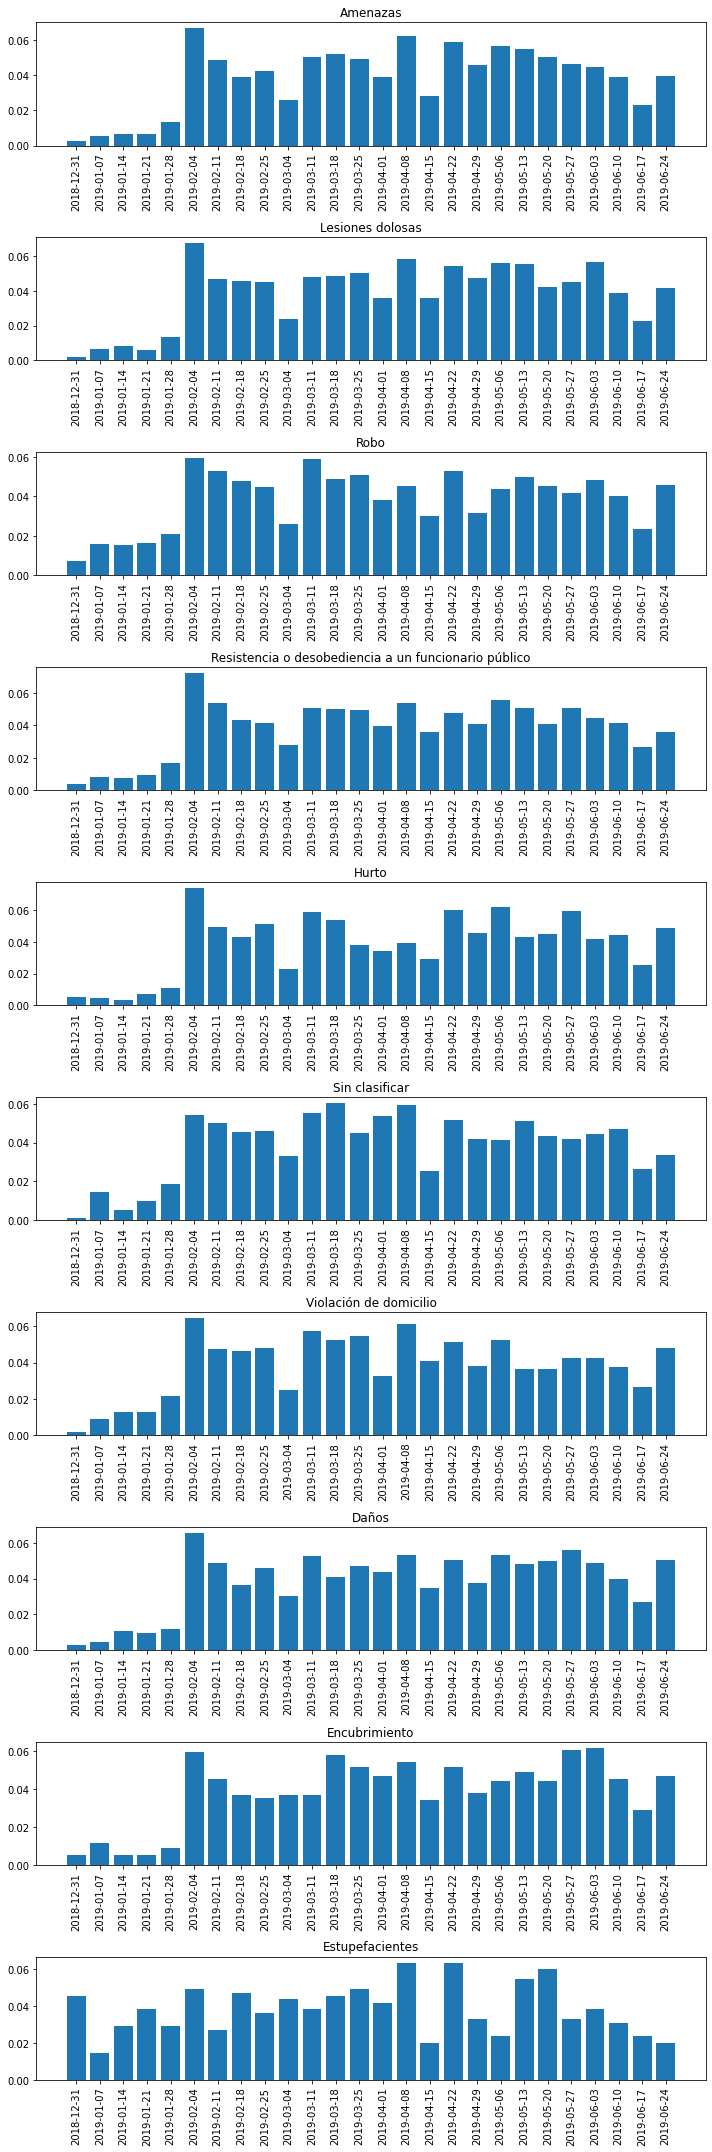

In [213]:
PROVINCIA_ID = 14
filter_ds = np.logical_and(ds.delito_estadistico != 'Sin informar', ds.provincia_id==PROVINCIA_ID)
delitos = ds[filter_ds].groupby("delito_estadistico").causa_id.count()
delitos = delitos.sort_values(ascending=False)

delitos = delitos.index[:10]
fig,axs = plt.subplots(len(delitos),1,figsize=(10,len(delitos)*3))


for i,d in enumerate(delitos):
    filter_ds = np.logical_and(ds.delito_estadistico==d, ds.provincia_id==PROVINCIA_ID) 
    cases = ds[filter_ds]
    cases_by_week = cases.groupby('week_start').causa_id.count().to_frame()
    cases_by_week.columns = ['count']
    cases_by_week['ratio_vs_semester'] = 1.0*cases_by_week['count']/len(cases)
    weeks = list(cases_by_week.index.strftime('%Y-%m-%d'))
    x = np.arange(len(weeks))

    axs[i].bar(x,cases_by_week.ratio_vs_semester)
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(weeks,rotation=90)
    axs[i].set_title(d)
    
fig.tight_layout()
plt.show()

In [200]:
filter_ds = np.logical_and(ds.delito_estadistico=="Robo", ds.provincia_id==14) 
cases = ds[filter_ds]
cases_by_week = cases.groupby('week_start').causa_id.count().to_frame()
cases_by_week.columns = ['count']
cases_by_week['ratio_cs_semester'] = 100.0*cases_by_week['count']/len(cases)
cases_by_week

weeks = list(cases_by_week.index.strftime('%Y-%m-%d'))
x = np.arange(len(weeks))

In [197]:
len(weeks)==len(x)

True

In [166]:
filter_ds = np.logical_and(ds['delito_estadistico']=='Sin informar', ds['provincia_id']==14)
ds[filter_ds].groupby("unidad_descripcion").causa_id.count().sort_values(ascending=False)

unidad_descripcion
MESA DE ENTRADAS DEL FUERO PENAL - SEC.PENAL TSJ                                                    5620
Área de Atención Inmediata                                                                           951
FISC.INSTRUCC.DE MEN.Y FAM 2A.NOM - RIO TERCERO                                                      415
SEC. DE LUCHA CONTRA EL NARCOTRAFICO-RIO CUARTO                                                      330
FISCALIA DE INSTRUCCION - OLIVA                                                                      240
FISC.INSTRUCC.Y FLIA. 1A.NOM. - RIO  TERCERO                                                         226
FISC.INSTRUC.COMPET.MULTIPLE 1° T-ALTA GRACIA                                                        187
FISC. DISTRITO 4 TURNO 1                                                                             172
SEC. DE LUCHA CONTRA EL NARCOTRAFICO-RIO TERCERO                                                     171
FISC.INSTRUC.COMPET.MULTIPLE 2° T-AL

In [163]:
provinces_ids

provincia_nombre  provincia_id
Chubut            26               1726
Corrientes        18              16124
Córdoba           14              35139
La Pampa          42                899
Río Negro         62               3065
Name: causa_id, dtype: int64